In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score , classification_report


In [35]:
# Dataset link (spam/ham SMS messages)
url_sms = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"

# Read TSV file (tab-separated values)
sms = pd.read_csv(url_sms, sep='\t', names=["label", "message"])

# Quick look
print(sms.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [36]:
sms.sample(5)

,label,message
1259,ham,Honey boo I'm missing u.
2527,ham,Do u noe how 2 send files between 2 computers?
1208,ham,I need you to be in my strong arms...
3021,ham,I thank you so much for all you do with selfle...
2771,ham,No problem. Talk to you later


In [37]:
print(sms.head())
sms.isnull().sum()

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


label      0
message    0
dtype: int64

In [42]:
# X = SMS messages (text)
X = sms["message"]

# y = Labels (ham/spam)
y = sms["label"]


In [43]:
# Convert text into Bag-of-Words representation
vectorizer = CountVectorizer()
X_vec = vectorizer.fit_transform(X)


In [45]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)


In [47]:
# Initialize Multinomial Naive Bayes
MNB = MultinomialNB() # Tpye of NB use for Text data 

In [48]:
MNB.fit(X_train,y_train)

MultinomialNB()

In [57]:
y_prid = MNB.predict(X_test)

In [73]:
print("NM MOdel on Spam SMS DATA")
print("Accuracy : ",accuracy_score(y_test,y_prid))
acc_nb = accuracy_score(y_test,y_prid)
print("\nNaive Bayes Report : \n", classification_report(y_test,y_prid))

NM MOdel on Spam SMS DATA
Accuracy :  0.9856502242152466

Naive Bayes Report : 
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [59]:
# WE got a good accuracy score Because of good data and good selection of model.

In [60]:
# SVM for Spam sms DATA

In [62]:
svm = SVC(kernel="linear")

In [65]:
svm.fit(X_train,y_train)

SVC(kernel='linear')

In [67]:
y_prid2 = svm.predict(X_test)

In [74]:
print("SVM on Spam SMS DATA ")
print("Accuracy : ",accuracy_score(y_test,y_prid2))
acc_svm = accuracy_score(y_test,y_prid2)
print("\nSVM Report\n",classification_report(y_test,y_prid2))

SVM on Spam SMS DATA 
Accuracy :  0.989237668161435

SVM Report
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       966
        spam       1.00      0.92      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115



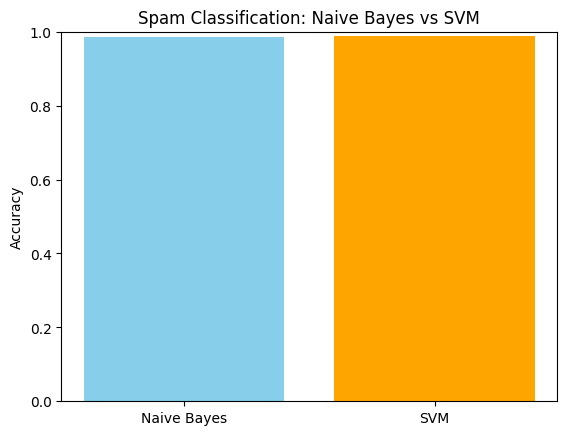

In [77]:
models = ["Naive Bayes", "SVM"]
accuracies = [acc_nb, acc_svm]

plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.ylabel("Accuracy")
plt.title("Spam Classification: Naive Bayes vs SVM")
plt.ylim(0, 1)
plt.show()

In [78]:
# DATA is Good 